In [45]:
import numpy as np
import torch
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../ml')
from modelloader import loadmodelfromlabel
from BMVarMiON import BMVarMiON

In [46]:
#Test dataset
N_samples = 1000

x_in = torch.tensor(np.load('../../../trainingdata/bm/12x12/test/x_in.npy'), dtype=torch.double)
x_out = torch.tensor(np.load('../../../trainingdata/bm/12x12/test/x_out.npy'), dtype=torch.double)
xi = torch.tensor(np.load('../../../trainingdata/bm/12x12/test/xi.npy'), dtype=torch.double)
x_D = torch.tensor(np.load('../../../trainingdata/bm/12x12/test/x_D.npy'), dtype=torch.double)

In [47]:
from BMVarMiON import BMVarMiON

model = BMVarMiON
logdir = '../../../nnlogs'
sublogdir = 'egg'
map_location = 'cpu'

model = loadmodelfromlabel(model=BMVarMiON, label='sigmas0.5', logdir=logdir, sublogdir=sublogdir, map_location=map_location)

In [48]:
x_out_hat = model.forward(x_in, x_D, xi)
for i in range(9):
    x_out_hat = model.forward(x_out_hat, x_D, xi)

In [49]:
x_D_plot = x_D.detach().numpy()
x_out_plot = x_out.detach().numpy()
x_out_hat_plot = x_out_hat.detach().numpy()

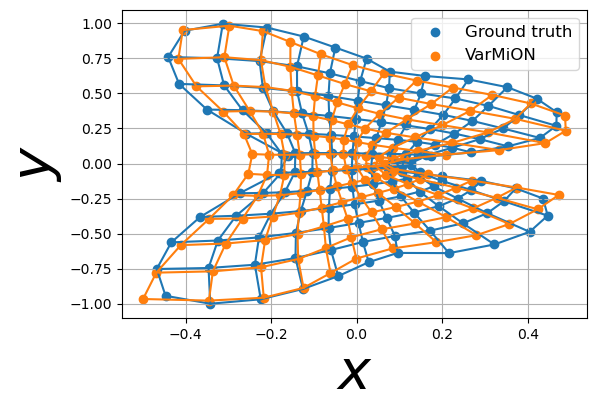

In [50]:
i = 0

size_title = 25
size_ticklabels = 10
size_axeslabels = 40


fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

ax.plot(x_out_plot[i,:,:,0], x_out_plot[i,:,:,1], color='C0')
ax.plot(np.rot90(x_out_plot[i,:,:,0]), np.rot90(x_out_plot[i,:,:,1]), color='C0')
ax.scatter(x_out_plot[i,:,:,0], x_out_plot[i,:,:,1], label='Ground truth', color='C0')
ax.plot(x_out_hat_plot[i,:,:,0], x_out_hat_plot[i,:,:,1], color='C1')
ax.plot(np.rot90(x_out_hat_plot[i,:,:,0]), np.rot90(x_out_hat_plot[i,:,:,1]), color='C1')
ax.scatter(x_out_hat_plot[i,:,:,0], x_out_hat_plot[i,:,:,1], label='VarMiON', color='C1')
ax.legend(fontsize=12)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
# ax.set_aspect('equal')
# ax.set_xlim(-1,-0.25)
# ax.set_ylim(-0.25,0.25)
ax.grid()

# plt.savefig("output_sym.svg", bbox_inches='tight')#, transparent=True)

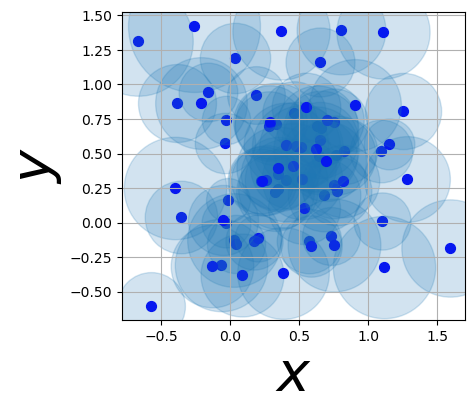

In [51]:
size_title = 25
size_ticklabels = 10
size_axeslabels = 40

mus = model.Trunk.mus.detach().numpy()
sigmas = torch.exp(model.Trunk.log_sigmas).detach().numpy()

x_sensor, y_sensor = np.mgrid[0:1:12*1j, 0:1:12*1j]

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

for i in range(72):
    ax.scatter(mus[i,0], mus[i,1], s=50, alpha=1, color='blue')
    ax.scatter(mus[i,0], mus[i,1], s=10000*sigmas[i], alpha=0.2, color='C0')
# ax.set_title(r"$\hat{\Theta}_j=\theta(\mathbf{x}_j)$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_aspect('equal')
# ax.set_xlim(-0.5,1.5)
# ax.set_ylim(-0.5,1.5)
# ax.set_xlim(0,1)
# ax.set_ylim(0,1)
ax.grid()

# plt.savefig("phis_boundedcenters_normbasis.svg", bbox_inches='tight')#, transparent=True)

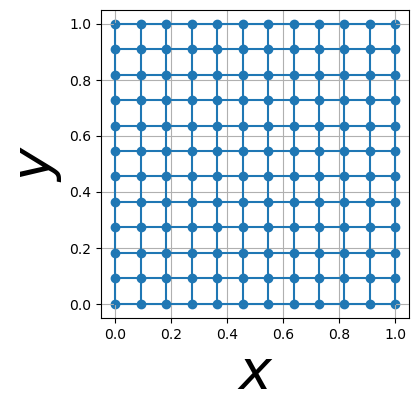

In [32]:
i = 10
xi_plot = xi.reshape((xi.shape[0], int(np.sqrt(xi.shape[1])), int(np.sqrt(xi.shape[1])), xi.shape[2]))

size_title = 25
size_ticklabels = 10
size_axeslabels = 40


fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

ax.plot(xi_plot[i,:,:,0], xi_plot[i,:,:,1], color='C0')
ax.plot(np.rot90(xi_plot[i,:,:,0]), np.rot90(xi_plot[i,:,:,1]), color='C0')
ax.scatter(xi[i,:,0], xi[i,:,1])
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_aspect('equal')
# ax.set_xlim(0,1)
# ax.set_ylim(0,1)
ax.grid()

# plt.savefig("unitsquare.svg", bbox_inches='tight')#, transparent=True)

### Test dataset errors

In [33]:
L2 = np.average(np.sqrt((x_in - x_out.detach().numpy())**2), axis=(-1,-2,-3))
L2_scaled = L2/np.average(np.sqrt((x_out.detach().numpy())**2), axis=(-1,-2,-3))
L2_scaled_avg = np.average(L2_scaled)
L2_scaled_avg

0.03805258096274657

In [209]:
from BMVarMiON import BMVarMiON

model = BMVarMiON
logdir = '../../../nnlogs'
sublogdir = 'bm2'
map_location = 'cpu'

VarMiON = loadmodelfromlabel(model=model, label='VarMiON', logdir=logdir, sublogdir=sublogdir, map_location=map_location)
translation_inv = loadmodelfromlabel(model=model, label='translation_inv', logdir=logdir, sublogdir=sublogdir, map_location=map_location)
scale_inv = loadmodelfromlabel(model=model, label='scale_inv', logdir=logdir, sublogdir=sublogdir, map_location=map_location)
rotref_inv = loadmodelfromlabel(model=model, label='rotref_inv', logdir=logdir, sublogdir=sublogdir, map_location=map_location)
allsymmetries = loadmodelfromlabel(model=model, label='allsymmetries', logdir=logdir, sublogdir=sublogdir, map_location=map_location)
# skip = loadmodelfromlabel(model=model, label='skip', logdir=logdir, sublogdir=sublogdir, map_location=map_location)
# allchanges = loadmodelfromlabel(model=model, label='allchanges', logdir=logdir, sublogdir=sublogdir, map_location=map_location)

modeldict = {'VarMiON': VarMiON,
             # 'translation_inv': translation_inv,
             # 'scale_inv': scale_inv,
             # 'rotref_inv': rotref_inv,
             # 'allsymmetries': allsymmetries}#,
             'skip': skip}
             # 'allchanges': allchanges}

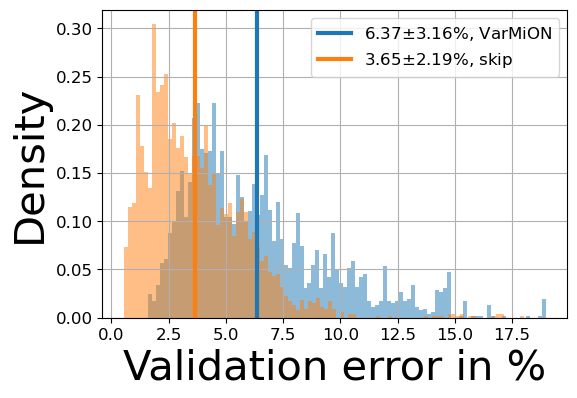

In [210]:
size_title = 20
size_ticklabels = 12
size_axeslabels = 30

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

colors = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9','C10']
L2_scaled_avgs = []
i=0
for model in modeldict:
    x_out_hat = modeldict[str(model)].forward(x_in, x_D, xi).detach().numpy()
    L2 = np.average(np.sqrt((x_out_hat - x_out.detach().numpy())**2), axis=(-1,-2,-3))
    L2_scaled = L2/np.average(np.sqrt((x_out.detach().numpy())**2), axis=(-1,-2,-3))
    # APE[np.abs(u_test)<1e-4] = np.nan
    # MAPE = np.nanmean(APE, axis=-1)
    L2_scaled_avg = np.average(L2_scaled)
    sigma = np.std(L2_scaled)
    ax.hist(100*L2_scaled, bins=100, density=True, alpha=0.5, linewidth=1, color=colors[i], histtype='bar')
    ax.axvline(100*L2_scaled_avg, 0, 1, linewidth=3, color=colors[i], label=str(np.around(100*L2_scaled_avg, 2))+r'$\pm$'+str(np.around(100*sigma, 2))+'%, '+str(model))
    i+=1
    L2_scaled_avgs.append(L2_scaled_avg)
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_xlim(0,3)
ax.legend(fontsize=12)
ax.tick_params(axis='both', labelsize=size_ticklabels)
# ax.ticklabel_format(style='sci', scilimits=[-3,3])
# ax.set_xlabel(r'$\langle|(\hat{u} - u^h)/u^h|\rangle$', fontsize=size_axeslabels)
ax.set_xlabel(r'Validation error in %', fontsize=size_axeslabels)
ax.set_ylabel(r'Density', fontsize=size_axeslabels)
ax.grid()
plt.savefig("BM.svg", bbox_inches='tight')#, transparent=True)

L2_scaled_avgs = np.array(L2_scaled_avgs)
L2_scaled_avg_avg = np.average(L2_scaled_avgs)
std_L2_scaled_avg = np.std(L2_scaled_avgs)
# print(100*L2_scaled_avg_avg)
# print(100*np.amin(L2_scaled_avgs))
# print(100*np.amax(L2_scaled_avgs))
# print(100*std_L2_scaled_avg)